In [36]:
# Import necessary methods and import data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('Assessment9\SAT Report 2015-2016.csv')
school = df[df['rtype'] == 'S']
# Use D for district data and S for school data
school


,index,cds,rtype,sname,dname,cname,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrit,NumGE1500,PctGE1500,year
3,3,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,88,92,391,376,386,5,5.43,1516
5,5,1611190106401,S,Alameda Science and Technology Institute,Alameda Unified,Alameda,37,35,572,612,530,30,85.71,1516
6,6,1611190119222,S,Nea Community Learning Center,Alameda Unified,Alameda,25,14,*,*,*,*,*,1516
7,7,1611190130229,S,Alameda High,Alameda Unified,Alameda,381,255,539,562,533,180,70.59,1516
8,8,1611190130609,S,Alameda Community Learning Center,Alameda Unified,Alameda,52,46,538,539,516,30,65.22,1516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,2327,58727286115935,S,Camptonville Academy,Camptonville Elementary,Yuba,39,10,*,*,*,*,*,1516
2329,2329,58727365830013,S,Lindhurst High,Marysville Joint Unified,Yuba,249,74,430,456,418,16,21.62,1516
2330,2330,58727365830138,S,Marysville Charter Academy for the Arts,Marysville Joint Unified,Yuba,38,21,532,500,513,13,61.90,1516
2331,2331,58727365835202,S,Marysville High,Marysville Joint Unified,Yuba,202,56,493,509,481,26,46.43,1516


In [38]:
# Select only relevant columns
school = school[['enroll12','NumTstTakr', 'AvgScrRead', 'AvgScrMath', 'AvgScrWrit']]

# Drop rows with null data
school = school.dropna(subset = ['AvgScrRead', 'AvgScrMath', 'AvgScrWrit'])
school.reset_index(drop = True, inplace = True)

# Drop rows with non-numeric values for average scores for reading, writing and math
rows = []
for i in range(len(school)):
    if not school.iloc[i]['AvgScrMath'].isnumeric():
        rows.append(i)
school.drop(rows, axis = 0, inplace = True)
school.reset_index(drop = True, inplace = True)

# Change data type for average scores to integers
columns = ['AvgScrRead', 'AvgScrMath', 'AvgScrWrit']
for col in columns:
    school[col] = school[col].astype(int)

# Added a column of total SAT score
school['Average_SAT_Score'] = (school['AvgScrRead']+school['AvgScrMath']+school['AvgScrWrit'])
# Dropped the average scores column
school.drop(columns, axis = 1, inplace = True)

school

,enroll12,NumTstTakr,Average_SAT_Score
0,88,92,1153
1,37,35,1714
2,381,255,1634
3,52,46,1593
4,31,17,1090
...,...,...,...
1247,300,117,1363
1248,249,74,1304
1249,38,21,1545
1250,202,56,1483


In [82]:
# Identify variables and targets
features = school.columns[1:2]
X = school[features].values
y = school['Average_SAT_Score'].values

# Split data set into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print(X_train.shape)
print(X_test.shape)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(876, 1)
(376, 1)


In [83]:
# Instantiate the linear regression and fit the model to data
lr = LinearRegression()
lr.fit(X_train, y_train)
actual = y_test

# Linear regression scores
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
print(f'Linear Regression train score: {lr_train_score}')
print(f'Linear Regression test score: {lr_test_score}')
lr_prediction = lr.predict(X_test)

# Instantiate ridge regression and fit data to model
# alpha = 10000, score = 0.02
rr = Ridge(alpha=1000)
rr.fit(X_train,y_train)

# Ridge Regression scores
ridge_train_score = rr.score(X_train, y_train)
ridge_test_score = rr.score(X_test, y_test)
print(f'Ridge Regression train score: {ridge_train_score}')
print(f'Ridge Regression test score: {ridge_test_score}')
rr_prediction = rr.predict(X_test)

# Instantiate lasso regression
LassoR = Lasso(alpha = 10)
LassoR.fit(X_train,y_train)

# Lasso regression scores
lasso_train_score =LassoR.score(X_train,y_train)
lasso_test_score =LassoR.score(X_test,y_test)
print(f'Lasso Regression train score: {lasso_train_score}')
print(f'Lasso Regression test score: {lasso_test_score}')
Lasso_prediction = LassoR.predict(X_test)

Linear Regression train score: 0.09261429855866199
Linear Regression test score: 0.04530506558226588
Ridge Regression train score: 0.06629875325782975
Ridge Regression test score: 0.04485979486594105
Lasso Regression train score: 0.0896774869000071
Lasso Regression test score: 0.05135469012991223


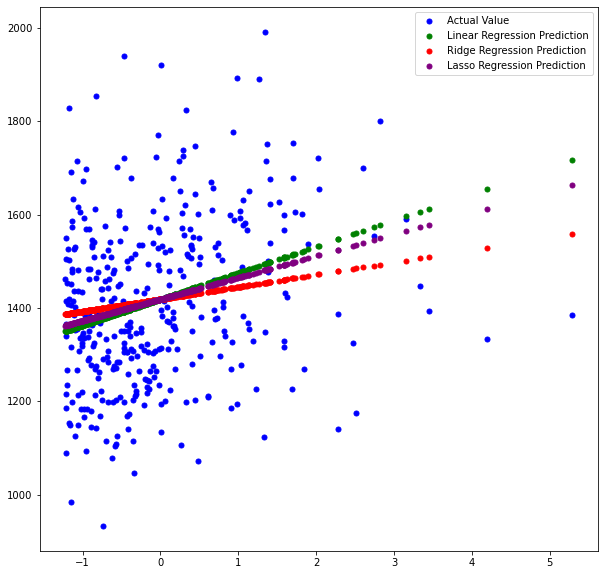

In [84]:
# Visualization
plt.figure(figsize = (10, 10))
plt.plot(X_test,actual,linestyle='none',marker='o',markersize=5,color='blue',label=r'Actual Value')
plt.plot(X_test,lr_prediction,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression Prediction')
plt.plot(X_test,rr_prediction,linestyle='none',marker='o',markersize=5,color='red',label='Ridge Regression Prediction')
plt.plot(X_test,Lasso_prediction,linestyle='none',marker='o',markersize=5,color='purple',label='Lasso Regression Prediction')
plt.legend();
